In [1]:
%%capture
# Local installation
!git clone https://github.com/speechbrain/speechbrain/
%cd /content/speechbrain/
!pip install -r requirements.txt
!pip install -e .
%%capture
# For pip installation
!pip install speechbrain

In [2]:
import speechbrain as sb
import os
import pandas as pd
import torchaudio
import numpy as np
import soundfile
from speechbrain.inference.speaker import EncoderClassifier
from tqdm import tqdm
import pickle

/content/speechbrain/speechbrain/utils/torch_audio_backend.py:60: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  available_backends = torchaudio.list_audio_backends()
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered chec

In [3]:
!wget http://lsa.tmit.bme.hu/files/age-samples.zip
!unzip age-samples.zip
!ls

--2025-11-14 21:33:32--  http://lsa.tmit.bme.hu/files/age-samples.zip
Resolving lsa.tmit.bme.hu (lsa.tmit.bme.hu)... 152.66.246.99
Connecting to lsa.tmit.bme.hu (lsa.tmit.bme.hu)|152.66.246.99|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 249657631 (238M) [application/x-zip-compressed]
Saving to: ‘age-samples.zip’

age-samples.zip     100%[===================>] 238.09M  3.19MB/s    in 46s     

2025-11-14 21:34:20 (5.19 MB/s) - ‘age-samples.zip’ saved [249657631/249657631]

unzip:  cannot find or open HungarianEmotionalSentences.zip, HungarianEmotionalSentences.zip.zip or HungarianEmotionalSentences.zip.ZIP.
['tools', 'README.md', '.git', 'tests', 'docs', 'templates', '.pre-push-config.yaml', 'LICENSE', 'CITATION.cff', '.pre-commit-config.yaml', 'requirements.txt', 'recipes', 'SECURITY.md', 'lint-requirements.txt', 'speechbrain.egg-info', '.dict-speechbrain.txt', 'speechbrain', '.gitignore', '.github', '.yamllint.yaml', '.readthedocs.yaml', 'uv.lock', 'age-sa

FileNotFoundError: [Errno 2] No such file or directory: '/content/speechbrain//2021o6_meta_hc.csv'

In [5]:
dir = "/content/speechbrain/"
# read file list
files = os.listdir(dir)
print(files)

# read metadata
meta = pd.read_csv(dir + "/2021o6_meta_hc.csv",sep=";")
meta

Archive:  age-samples.zip
  inflating: 2021o6_meta_hc.csv      
  inflating: HC_001.wav              
  inflating: HC_002.wav              
  inflating: HC_003.wav              
  inflating: HC_004.wav              
  inflating: HC_0048_07_f.wav        
  inflating: HC_0049_06_f.wav        
  inflating: HC_005.wav              
  inflating: HC_0050_04_f.wav        
  inflating: HC_0051_03_f.wav        
  inflating: HC_0053_06_f.wav        
  inflating: HC_0054_02_f.wav        
  inflating: HC_0055_08_f.wav        
  inflating: HC_0056_00_f.wav        
  inflating: HC_0057_01_f.wav        
  inflating: HC_0058_01_f.wav        
  inflating: HC_0059_00_f.wav        
  inflating: HC_0060_03_f.wav        
  inflating: HC_0061_02_f.wav        
  inflating: HC_0062_02_m.wav        
  inflating: HC_0064_05_f.wav        
  inflating: HC_0066_02_m.wav        
  inflating: HC_0067_03_m.wav        
  inflating: HC_0068_04_m.wav        
  inflating: HC_0069_00_m.wav        
  inflating: HC_007.wav 

,sample,sex,age
0,HC_031ffi,male,51
1,HC_032ffi,male,60
2,HC_033ffi,male,52
3,HC_034ffi,male,44
4,HC_035ffi,male,25
...,...,...,...
221,HE_H029_F_01,female,67
222,HE_H030_F_01,male,75
223,HE_H031_F_01,male,76
224,HE_H032_F_01,female,77


In [6]:
# calculate embeddings
classifier = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", run_opts={"device":"cuda"})
signals = []
names = []
ages = []
sexes = []
embeddings = []
for _f in tqdm(files):
    meta_sel = meta[meta["sample"].str.lower() == _f.replace(".wav","").lower()]
    if len(meta_sel) > 0:
        ages.append(meta_sel.iloc[0]["age"])
        sexes.append(meta_sel.iloc[0]["sex"])
        names.append(_f)

        # calc emb
        signal, fs =torchaudio.load(dir + _f)
        embedding = classifier.encode_batch(signal)
        embeddings.append(np.array(embedding[0][0].cpu()))



INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached


hyperparams.yaml: 0.00B [00:00, ?B/s]

/content/speechbrain/speechbrain/utils/torch_audio_backend.py:60: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  available_backends = torchaudio.list_audio_backends()
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _load
DEBUG:speechbrain.utils.checkpoints:Registered parameter transfer hook for _load
/content/speechbrain/speechbrain/utils/autocast.py:188: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.

embedding_model.ckpt:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["embedding_model"] = /root/.cache/huggingface/hub/models--speechbrain--spkrec-ecapa-voxceleb/snapshots/0f99f2d0ebe89ac095bcc5903c4dd8f72b367286/embedding_model.ckpt
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached


mean_var_norm_emb.ckpt:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["mean_var_norm_emb"] = /root/.cache/huggingface/hub/models--speechbrain--spkrec-ecapa-voxceleb/snapshots/0f99f2d0ebe89ac095bcc5903c4dd8f72b367286/mean_var_norm_emb.ckpt
INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached


classifier.ckpt:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["classifier"] = /root/.cache/huggingface/hub/models--speechbrain--spkrec-ecapa-voxceleb/snapshots/0f99f2d0ebe89ac095bcc5903c4dd8f72b367286/classifier.ckpt
INFO:speechbrain.utils.fetching:Fetch label_encoder.txt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached


label_encoder.txt: 0.00B [00:00, ?B/s]

DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["label_encoder"] = /root/.cache/huggingface/hub/models--speechbrain--spkrec-ecapa-voxceleb/snapshots/0f99f2d0ebe89ac095bcc5903c4dd8f72b367286/label_encoder.txt
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: embedding_model, mean_var_norm_emb, classifier, label_encoder
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): embedding_model -> /root/.cache/huggingface/hub/models--speechbrain--spkrec-ecapa-voxceleb/snapshots/0f99f2d0ebe89ac095bcc5903c4dd8f72b367286/embedding_model.ckpt
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): mean_var_norm_emb -> /root/.cache/huggingface/hub/models--speechbrain--spkrec-ecapa-voxceleb/snapshots/0f99f2d0ebe89ac095bcc5903c4dd8f72b367286/mean_var_norm_emb.ckpt
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): classifier -> /root/.cache/huggingface/hub/models--speechb

In [7]:
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn import svm
from sklearn.manifold import TSNE
loo = LeaveOneOut()
X = np.array(embeddings)
y = np.array(sexes)
loo.get_n_splits(X)

orig = []
pred = []

for i, (train_index, test_index) in enumerate(loo.split(X)):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    clf = svm.SVC(kernel = 'linear', probability=(False))
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    orig.append(y_test[0])
    pred.append(y_pred)

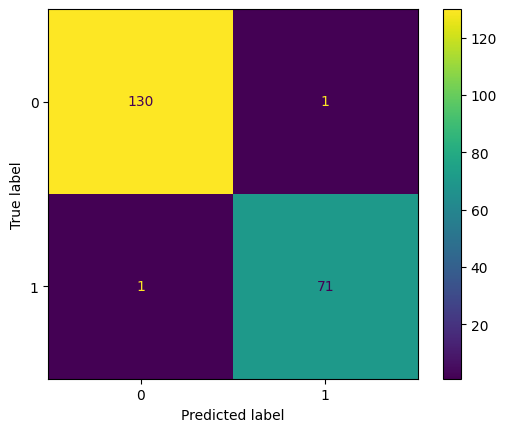

In [8]:
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(orig, pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

17.448407520422634


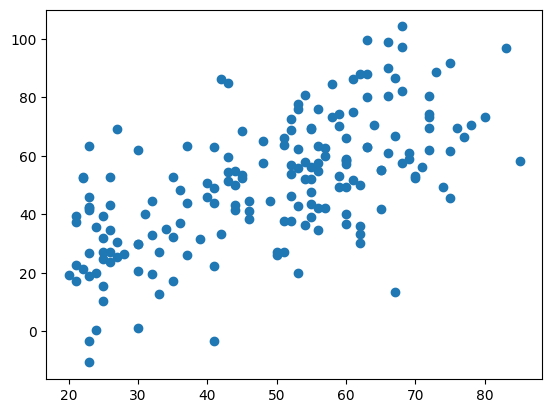

In [10]:
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn import svm
from sklearn.manifold import TSNE
loo = LeaveOneOut()
kf = KFold(n_splits=10)
ages = np.array(ages)
X = np.array(embeddings)
X = X[ages!="-"]
y = ages[ages!="-"].astype(np.float16)
y = np.array(y)
loo.get_n_splits(X)
kf.get_n_splits(X)

orig = []
pred = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    clf = svm.SVR(kernel = 'linear')
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    orig.extend(y_test)
    pred.extend(y_pred)

from sklearn.metrics import root_mean_squared_error
plt.scatter(orig,pred)
print(root_mean_squared_error(orig,pred))

17.825912528726743


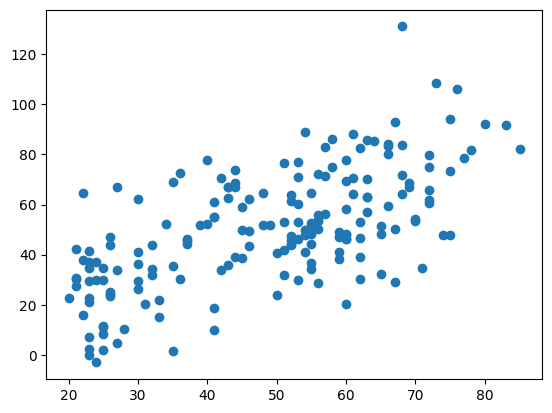